# Discretization 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import seaborn as sns




In [2]:
df = pd.read_csv("../Social_Network_Ads.csv")

In [3]:
df.cov()

ValueError: could not convert string to float: 'Male'

In [ ]:
df.head()
df = df.drop(columns=["User ID"])

In [ ]:
X = df.iloc[:, 0:3]
Y = df.iloc[:, -1]

In [ ]:
X



,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
Xtrain.shape, Xtest.shape

((280, 3), (120, 3))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
trf1 = ColumnTransformer([("Encoding", OneHotEncoder(sparse_output=False), [0]),
                          ("Scaling", StandardScaler(with_mean=True, with_std=True), [1 ,2])])

In [ ]:
trf2 = ColumnTransformer([("discretizer", KBinsDiscretizer(strategy="kmeans", n_bins=10, encode="ordinal"), [1, 2])])

In [ ]:
trf3 = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline([("tranformation", trf1), ("Discretizer", trf2), ("model", trf3)])

In [ ]:
pipe.fit(Xtrain, Ytrain)

c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:396: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tranformation', ...), ('Discretizer', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Encoding', ...), ('Scaling', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the diff

In [ ]:
pred1 = pipe.predict(Xtest)

In [ ]:
accuracy_score(Ytest, pred1)

0.875

In [ ]:
np.mean(cross_val_score(pipe, X, Y, scoring="accuracy", cv = 10))

c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:396: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:396: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warning

0.8375

In [ ]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [ ]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
test2 = np.array(["Male", 500, 400000000], dtype="object").reshape(1, 3)

In [ ]:
pipe.predict(test2)

c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\Desktop\Access\ML\ds_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

<Axes: xlabel='Age', ylabel='Purchased'>

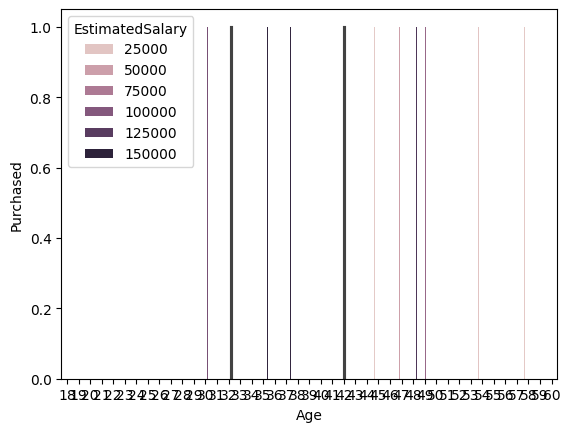

In [ ]:
sns.barplot(x = df["Age"], y=df["Purchased"], hue = df["EstimatedSalary"])

<Axes: xlabel='Age', ylabel='Purchased'>

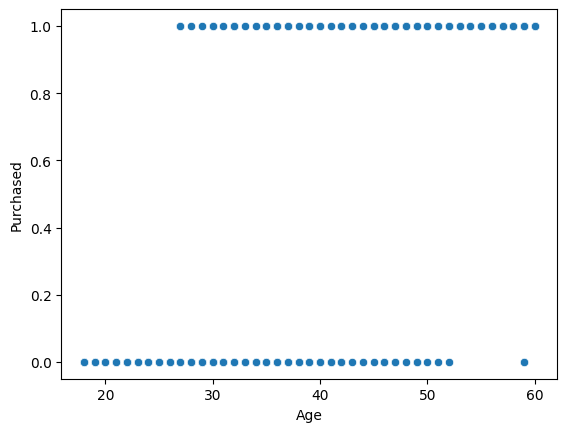

In [ ]:
sns.scatterplot(x = df["Age"], y = df["Purchased"])

<Axes: >

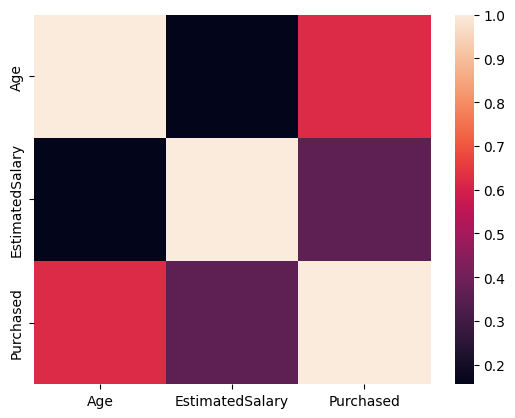

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
df_noAge = df.drop(columns=["Gender"], axis=1)

In [ ]:
df_noAge.info()
df_noAge.cov()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


,Age,EstimatedSalary,Purchased
Age,109.890702,5.548738e+04,3.131165
EstimatedSalary,55487.380952,1.162603e+09,5924.367168
Purchased,3.131165,5.924367e+03,0.230269
